# Handling Numerical values using mean and medain

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [36]:
df=pd.read_csv('csv/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [37]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [39]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [40]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train

,Age,Fare,Family
857,51.0,26.5500,0
52,49.0,76.7292,1
386,1.0,46.9000,7
124,54.0,77.2875,1
578,NaN,14.4583,1
...,...,...,...
835,39.0,83.1583,2
192,19.0,7.8542,1
629,NaN,7.7333,0
559,36.0,17.4000,1


In [42]:
x_train['Age_mean']=x_train['Age'].fillna(x_train['Age'].mean())
x_train['Age_median']=x_train['Age'].fillna(x_train['Age'].median())
x_train['Fare_mean']=x_train['Fare'].fillna(x_train['Fare'].mean())
x_train['Fare_median']=x_train['Fare'].fillna(x_train['Fare'].median())


In [43]:
x_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
70,32.0,10.5000,0,32.000000,32.0,10.5000,10.5000
593,NaN,7.7500,2,29.915339,29.0,7.7500,7.7500
130,33.0,7.8958,0,33.000000,33.0,7.8958,7.8958
149,42.0,13.0000,0,42.000000,42.0,13.0000,13.0000
517,NaN,24.1500,0,29.915339,29.0,24.1500,24.1500


In [44]:
print(x_train['Age'].var(),'|',x_train['Age_mean'].var(),'|',x_train['Age_median'].var())
print(x_train['Fare'].var(),'|',x_train['Fare_mean'].var(),'|',x_train['Fare_median'].var())

210.4528692463678 | 169.51268085599725 | 169.64401397346103
2378.850836641955 | 2252.6417086529127 | 2268.7904337281766


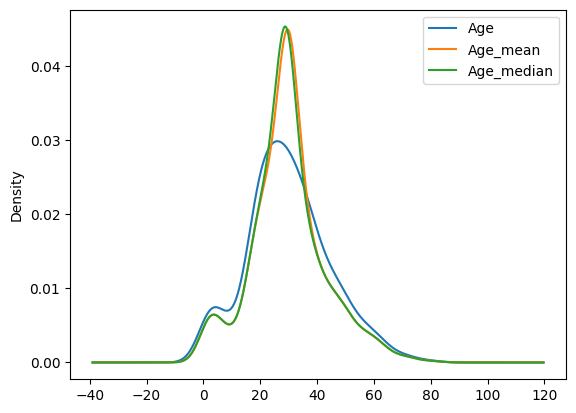

In [45]:
fig=plt.figure()
ax=fig.add_subplot()

x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_mean'].plot(kind='kde',ax=ax)
x_train['Age_median'].plot(kind='kde',ax=ax)

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

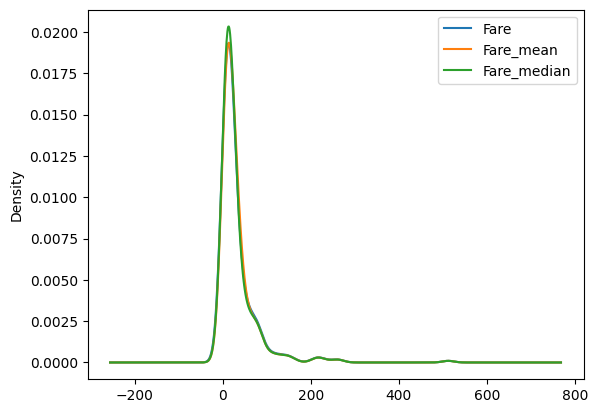

In [46]:
fig=plt.figure()
ax=fig.add_subplot()

x_train['Fare'].plot(kind='kde',ax=ax)
x_train['Fare_mean'].plot(kind='kde',ax=ax)
x_train['Fare_median'].plot(kind='kde',ax=ax)

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [47]:
x_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.452869,88.495367,-6.086107,210.452869,210.452869,83.523671,83.277817
Fare,88.495367,2378.850837,17.556587,71.044753,72.433134,2378.850837,2378.850837
Family,-6.086107,17.556587,2.844782,-4.902154,-4.912644,16.625128,16.726309
Age_mean,210.452869,71.044753,-4.902154,169.512681,169.512681,67.275497,67.077470
Age_median,210.452869,72.433134,-4.912644,169.512681,169.644014,68.590218,68.355010
Fare_mean,83.523671,2378.850837,16.625128,67.275497,68.590218,2252.641709,2252.641709
Fare_median,83.277817,2378.850837,16.726309,67.077470,68.355010,2252.641709,2268.790434


In [48]:
x_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.118049,-0.287479,1.000000,1.000000,0.115280,0.114471
Fare,0.118049,1.000000,0.210147,0.111447,0.113582,1.000000,1.000000
Family,-0.287479,0.210147,1.000000,-0.223235,-0.223626,0.207680,0.208199
Age_mean,1.000000,0.111447,-0.223235,1.000000,0.999613,0.108870,0.108163
Age_median,1.000000,0.113582,-0.223626,0.999613,1.000000,0.110955,0.110180
Fare_mean,0.115280,1.000000,0.207680,0.108870,0.110955,1.000000,0.996435
Fare_median,0.114471,1.000000,0.208199,0.108163,0.110180,0.996435,1.000000


<Axes: >

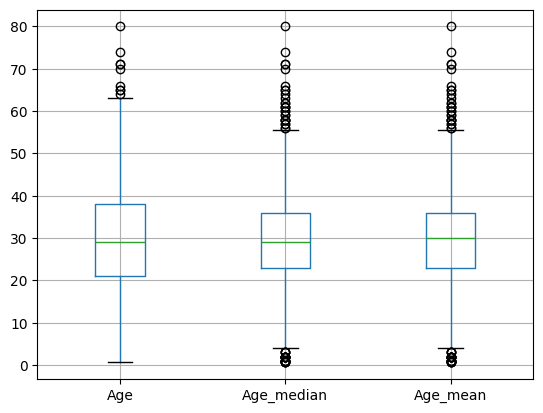

In [49]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

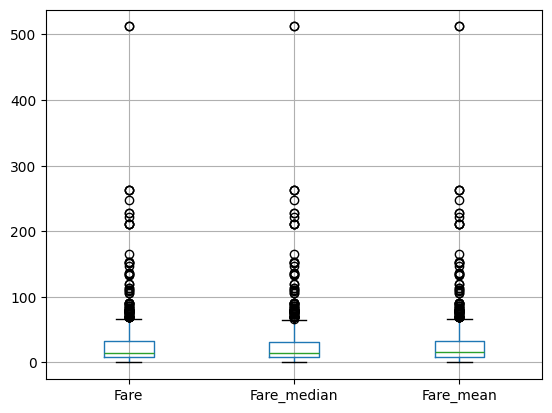

In [50]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

## Sklearn

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [52]:
si1=SimpleImputer(strategy='mean')
si2=SimpleImputer(strategy='median')

In [53]:
trf=ColumnTransformer([
    ('i1',si1,['Age']),
    ('i2',si1,['Fare'])
],remainder='passthrough')

In [61]:
x_train.head()

,Age,Fare,Family
857,51.0,26.5500,0
52,49.0,76.7292,1
386,1.0,46.9000,7
124,54.0,77.2875,1
578,NaN,14.4583,1


In [55]:
trf.fit(x_train)

c:\Users\moury\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('i1', SimpleImputer(), ['Age']),
                                ('i2', SimpleImputer(), ['Fare'])])

In [60]:
pd.DataFrame(trf.transform(x_train),columns=x_train.columns).head()

,Age,Fare,Family
0,51.000000,26.5500,0.0
1,49.000000,76.7292,1.0
2,1.000000,46.9000,7.0
3,54.000000,77.2875,1.0
4,29.915339,14.4583,1.0


In [67]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [ ]:
trf.named_transformers_['i1'].statistics_
trf.named_transformers_['i2'].statistics_

array([32.42773237])